In [55]:
import numpy as np
import pandas as pd
import logomaker as lm
import matplotlib.pyplot as plt

# Read CSV file #

In [56]:
pscm_data = pd.read_csv('HW #4_ PSCM data - Sheet1.csv', header = None, index_col = [0])

In [57]:
pscm_data

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
> OCT4_1,Source: http://www.genome.org/cgi/doi/10.1101/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,331,881.0,92.0,53.0,100.0,954.0,833.0,363.0,301.0,321.0
C,247,59.0,0.0,50.0,730.0,47.0,44.0,173.0,231.0,201.0
G,217,0.0,64.0,839.0,110.0,0.0,57.0,237.0,198.0,209.0
T,207,62.0,846.0,60.0,62.0,1.0,68.0,229.0,272.0,271.0
> OCT4_2,Source: https://doi.org/10.1093/bioinformatics...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,30,54.0,11.0,13.0,33.0,23.0,7.0,78.0,2.0,66.0
C,42,13.0,5.0,24.0,6.0,23.0,85.0,15.0,9.0,7.0
G,17,13.0,9.0,0.0,5.0,43.0,8.0,6.0,16.0,20.0


# Convert String to integer values

In [58]:
oct4_1_pscm = pscm_data[1:5].astype(float)

In [59]:
oct4_2_pscm = pscm_data[6:11].astype(float)

# Calculate column sum

In [60]:
oct4_1_pscm.loc['sum'] = oct4_1_pscm[0:4].sum(axis = 0)
oct4_2_pscm.loc['sum'] = oct4_2_pscm[0:4].sum(axis = 0)

# Create background probability dataframe

In [61]:
base_list = ['A','C','G','T']
pseudo_c = 0.1
gc_content = 0.50
pr = [(1-gc_content)/2, gc_content/2, gc_content/2, (1-gc_content)/2]
bg_pr = pd.DataFrame(pr, index = base_list, columns = ['background_pr'])
bg_pr

,background_pr
A,0.25
C,0.25
G,0.25
T,0.25


# Create Position Specific Frequency Matrix

In [62]:
bg_pr_x_pseudo_c = bg_pr * pseudo_c
oct4_1_psfm = (oct4_1_pscm.iloc[0:4] + np.array(bg_pr_x_pseudo_c))/(oct4_1_pscm.iloc[-1] + pseudo_c)
oct4_2_psfm = (oct4_2_pscm.iloc[0:4] + np.array(bg_pr_x_pseudo_c))/(oct4_2_pscm.iloc[-1] + pseudo_c)

# Create Position Weight Matrix

In [63]:
pwm_oct4_1 = np.log(oct4_1_psfm / np.array(bg_pr))
pwm_oct4_2 = np.log(oct4_2_psfm / np.array(bg_pr))

In [64]:
pwm_oct4_1.loc['>OCT4_1'] = np.NaN

pwm_oct4_2.loc['>OCT4_2'] = np.NaN

pwm_fasta = pd.concat([pwm_oct4_1, pwm_oct4_2])
pwm_fasta = pd.concat([pwm_oct4_1.iloc[[-1]], pwm_oct4_1.iloc[:-1],
                      pwm_oct4_2.iloc[[-1]], pwm_oct4_2.iloc[:-1]])
pwm_fasta.to_csv('pwm_fasta.csv', header = False)
pwm_fasta

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
>OCT4_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,0.278635,1.257527,-1.001498,-1.552795,-0.918139,1.337131,1.201505,0.370913,0.183635,0.247960
C,-0.014069,-1.445598,-9.212438,-1.611036,1.069520,-1.672879,-1.738801,-0.370123,-0.081033,-0.220129
G,-0.143546,-9.212438,-1.364285,1.208682,-0.822851,-9.212438,-1.480069,-0.055393,-0.235165,-0.181105
T,-0.190719,-1.396021,1.216990,-1.428798,-1.396021,-5.498866,-1.303683,-0.089728,0.082335,0.078652
>OCT4_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,0.182155,0.769572,-0.819710,-0.653005,0.277390,-0.083295,-1.270400,1.137154,-2.514306,0.970158
C,0.518389,-0.653005,-1.605450,-0.040780,-1.423958,-0.083295,1.223070,-0.510160,-1.019877,-1.270400
G,-0.385192,-0.653005,-1.019877,-6.908755,-1.605450,0.541906,-1.137314,-1.423958,-0.445725,-0.222894


# Generate Sequence Logo Images

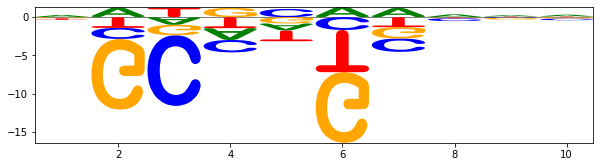

In [68]:
logo = lm.Logo(pwm_oct4_1[:-1].T, font_name = 'Arial Rounded MT Bold')
plt.savefig('logo.png')

In [66]:
plt.savefig('logo.pdf')

<Figure size 432x288 with 0 Axes>

In [14]:
pwm_oct4_1

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
A,0.278635,1.257527,-1.001498,-1.552795,-0.918139,1.337131,1.201505,0.370913,0.183635,0.247960
C,-0.014069,-1.445598,-9.212438,-1.611036,1.069520,-1.672879,-1.738801,-0.370123,-0.081033,-0.220129
G,-0.143546,-9.212438,-1.364285,1.208682,-0.822851,-9.212438,-1.480069,-0.055393,-0.235165,-0.181105
T,-0.190719,-1.396021,1.216990,-1.428798,-1.396021,-5.498866,-1.303683,-0.089728,0.082335,0.078652


In [2]:
def MakePWM(input_file, output_file, bg, k):
    
    #input_file: input file name
    #output_file: output file name
    #bg: GC content
    #k: pseudo count
    
    #Read input csv file
    pscm_data = pd.read_csv(input_file, header = None, index_col = [0])
    
    #Convert string data into integer data
    oct4_1_pscm = pscm_data[1:5].astype(float)
    oct4_2_pscm = pscm_data[6:11].astype(float)
    
    #Calculate column sum
    oct4_1_pscm.loc['sum'] = oct4_1_pscm[0:4].sum(axis = 0)
    oct4_2_pscm.loc['sum'] = oct4_2_pscm[0:4].sum(axis = 0)
    
    #Create background probability dataframe
    base_list = ['A','C','G','T']
    pseudo_c = k
    gc_content = bg
    pr = [(1-gc_content)/2, gc_content/2, gc_content/2, (1-gc_content)/2]
    bg_pr = pd.DataFrame(pr, index = base_list, columns = ['background_pr'])
    bg_pr_x_pseudo_c = bg_pr * pseudo_c
    
    #Create Position Specific Frequency Matrix (PSFM)
    oct4_1_psfm = (oct4_1_pscm.iloc[0:4] + np.array(bg_pr_x_pseudo_c))/(oct4_1_pscm.iloc[-1] + pseudo_c)
    oct4_2_psfm = (oct4_2_pscm.iloc[0:4] + np.array(bg_pr_x_pseudo_c))/(oct4_2_pscm.iloc[-1] + pseudo_c)
    
    #Create Position Weight Matrix (PWM) 
    pwm_oct4_1 = np.log(oct4_1_psfm / np.array(bg_pr))
    pwm_oct4_2 = np.log(oct4_2_psfm / np.array(bg_pr))
    
    #Sequence Name
    pwm_oct4_1.loc['>OCT4_1'] = np.NaN
    pwm_oct4_2.loc['>OCT4_2'] = np.NaN

    #Concatenate pwm_oct4_1 and pwm_oct4_2 dataframes
    pwm_fasta = pd.concat([pwm_oct4_1.iloc[[-1]], pwm_oct4_1.iloc[:-1],
                          pwm_oct4_2.iloc[[-1]], pwm_oct4_2.iloc[:-1]])
    
    #save pwm_fasta as csv file
    pwm_fasta.to_csv(output_file, header = False)
    
    #generate sequence logo
    lm.Logo(pwm_oct4_1[:-1].T, font_name = 'Arial Rounded MT Bold')
    lm.Logo(pwm_oct4_2[:-1].T, font_name = 'Arial Rounded MT Bold')

In [3]:
input_file = 'HW #4_ PSCM data - Sheet1.csv'
output_file = 'PWM_fasta.csv'
bg = 0.5
k = 0.1

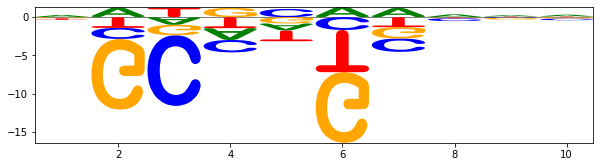

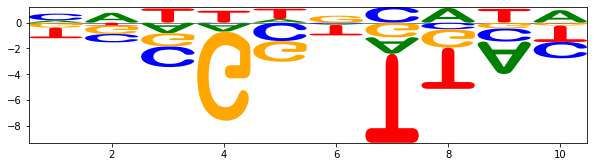

In [4]:
MakePWM(input_file, output_file, bg, k)

In [48]:
def FindMotifs(input_file, pwm_file):
    
    #Read sequence from file
    f = open(input_file,'r')
    lines = f.readlines()
    enhancer_seq = lines[1]
    
    #Read PWM 
    pwm_file = 'pwm_fasta.csv'
    pwm = pd.read_csv(pwm_file, header = None, index_col = [0])
    pwm_oct4_1 = pwm[1:5]
    pwm_oct4_2 = pwm[6:11]
    
    window_len = 10
    score_dict_oct4_1 = {}
    score_dict_oct4_2 = {}
    
    for i in range(len(enhancer_seq) - (window_len - 1)):
        
        seq = enhancer_seq[i:i+window_len]
        
        oct4_1_score = 0
        oct4_2_score = 0
        
        for j in range(len(seq)):
            oct4_1_score += pwm_oct4_1.loc[seq[j], j+1]
            oct4_2_score += pwm_oct4_2.loc[seq[j], j+1]
        if oct4_1_score > 0.5:
            score_dict_oct4_1[seq] = (i, i + window_len - 1, oct4_1_score) #zero indexed
        if oct4_2_score > 0.5:
            score_dict_oct4_2[seq] = (i, i + window_len - 1, oct4_2_score) #zero indexed
    return score_dict_oct4_1, score_dict_oct4_2

In [49]:
pwm_file = 'pwm_fasta.csv'
pwm = pd.read_csv(pwm_file, header = None, index_col = [0])
oct4_1 = pwm[1:5]
oct4_2 = pwm[6:11]

In [50]:
input_file = 'enhancer.txt'
pwm_file = 'pwm_fasta.csv'
score_dict_oct4_1, score_dict_oct4_2 = FindMotifs(input_file, pwm_file)

In [52]:
score_dict_oct4_1
sorted_score_dict_oct4_1 = sorted(score_dict_oct4_1.items(), key=lambda x:x[1][2], reverse = True)
sorted_score_dict_oct4_1

[('CATGGAACTT', (35, 44, 5.175780079499763)),
 ('GAAGGAAGAA', (84, 93, 3.4131512631519487)),
 ('GAAGGAAAGG', (91, 100, 2.991592172655572)),
 ('AAGGAAAGGT', (92, 101, 2.789150538368624)),
 ('AATACAGATG', (53, 62, 2.399083117755221)),
 ('AATGTAGTCT', (70, 79, 2.330767497084799)),
 ('ACTCCAACAA', (45, 54, 2.1086203378521806)),
 ('GCTGCCATCA', (106, 115, 1.511873799636136)),
 ('GCTGAATAAA', (62, 71, 0.7543452290843489)),
 ('AAGGAAGAAG', (85, 94, 0.6929255613472663)),
 ('AATAAAGACA', (152, 161, 0.6771215879853867)),
 ('GAAGAAGGAA', (88, 97, 0.6362899196472513)),
 ('AATAAATGTA', (66, 75, 0.5905690669344377))]